In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [32]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(
    mean=None,
    cov = 0.1,
    n_samples= N,
    n_features= 2,
    n_classes= 2,
    shuffle= True,
    random_state= None,
)
X, Y = gaussian_quantiles

In [33]:
Y = Y[:, np.newaxis]

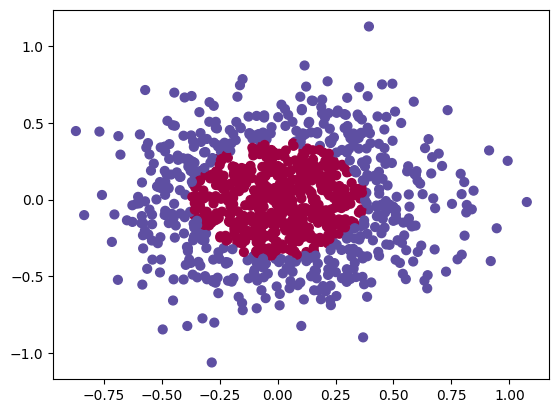

In [34]:
plt.scatter(X[:, 0], X[:, 1], c =Y[:, 0], s=40, cmap = plt.cm.Spectral)

Funciones de Activacion

In [35]:
def sigmoid(x, derivate = False):
  if derivate:
    return np.exp(-x)/((np.exp(-x) + 1) ** 2)
  else:
    return 1/ (1 + np.exp(-x))

def relu(x, derivate = False):
  if derivate:
    x[x <= 0] = 0
    x[ x > 0] = 1
    return x
  else:
    return np.maximum(0, x)

Funcion de Perdida

In [36]:
def mse(y, y_hat, derivate = False):
  if derivate:
    return (y_hat - y)
  else:
    return np.mean((y_hat - y)**2)

Estructura de la Red Neuronal

generar capas de la red neuronal de manera aleatoria

In [37]:
def inicializar_parametros_deep(layers_dim):
  parametros = {}
  L = len(layers_dim)
  for l in range(0,L-1):
    parametros['W'+str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1])* 2) -1
    parametros['b'+str(l+1)] = (np.random.rand(1,layers_dim[l+1])* 2) -1
  return parametros

In [38]:
layers_dim = [2, 4, 8, 1]
params = inicializar_parametros_deep(layers_dim)
params

{'W1': array([[-0.46388097,  0.70856183, -0.94727058, -0.43323755],
        [ 0.16862542, -0.28942433,  0.94451254,  0.30157284]]),
 'b1': array([[ 0.04561713, -0.52298893,  0.96731977,  0.97660205]]),
 'W2': array([[ 0.54323206,  0.3950384 ,  0.88863434, -0.96357824, -0.80195182,
          0.03924994, -0.45629808, -0.28884643],
        [-0.32002893, -0.31218793, -0.39626117, -0.55643004, -0.74851806,
          0.23273949, -0.15951058,  0.73558022],
        [ 0.41094829, -0.25838428,  0.01569636,  0.50730119, -0.06229536,
         -0.6762766 , -0.78716345,  0.89863612],
        [ 0.42932945, -0.39013307,  0.86528608, -0.19003044,  0.16365213,
         -0.69051028,  0.37693097,  0.25698759]]),
 'b2': array([[-0.43140427,  0.75441976,  0.58478552, -0.80560378, -0.78393036,
          0.28374398,  0.41271764, -0.84961706]]),
 'W3': array([[-0.30504499],
        [ 0.44444652],
        [-0.10558552],
        [ 0.84636054],
        [ 0.56532961],
        [ 0.66399422],
        [-0.51324997],


In [39]:
params['W1'].shape

(2, 4)

In [40]:
X.shape

(1000, 2)

In [41]:
np.matmul(X, params['W1']).shape

(1000, 4)

In [42]:
X@params['W1']

array([[-0.15020629,  0.2303097 , -0.32321293, -0.14424111],
       [ 0.02414752, -0.03890739,  0.08742359,  0.0317024 ],
       [-0.32487188,  0.49802723, -0.69726078, -0.31153888],
       ...,
       [-0.07843829,  0.10709992,  0.07932423, -0.01575858],
       [-0.30234283,  0.47430928, -0.85274514, -0.33887103],
       [-0.10873401,  0.1488522 ,  0.10268196, -0.02359292]])

In [43]:
def train(x_data, lr, params, traing = True):
  ## Forward
  params['A0'] = x_data

  params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
  params['A1'] = relu(params['Z1'])

  params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
  params['A2'] = relu(params['Z2'])

  params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
  params['A3'] = sigmoid(params['Z3'])

  output = params['A3']
  if traing:
    ##Backpropagation

    params['dZ3'] = mse(Y, output, True) * sigmoid(params['A3'], True)
    params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

    params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], True)
    params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

    params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'], True)
    params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])

    ## Gradient descent

    params['W3'] = params['W3'] - params['dW3'] * lr
    params['b3'] = params['b3'] - (np.mean(params['dW3'], axis = 0, keepdims=True)) * lr

    params['W2'] = params['W2'] - params['dW2'] * lr
    params['b2'] = params['b2'] - (np.mean(params['dW2'], axis = 0, keepdims=True)) * lr

    params['W1'] = params['W1'] - params['dW1'] * lr
    params['b1'] = params['b1'] - (np.mean(params['dW1'], axis = 0, keepdims=True)) * lr
  return output

In [ ]:
layers_dim = [2, 4, 8, 1]
params = inicializar_parametros_deep(layers_dim)
errors = []
for _ in range(60000):
  output = train(X, 0.00001, params)
  if _ % 25 == 0:
    print(mse(Y, output))
    errors.append(mse(Y, output))

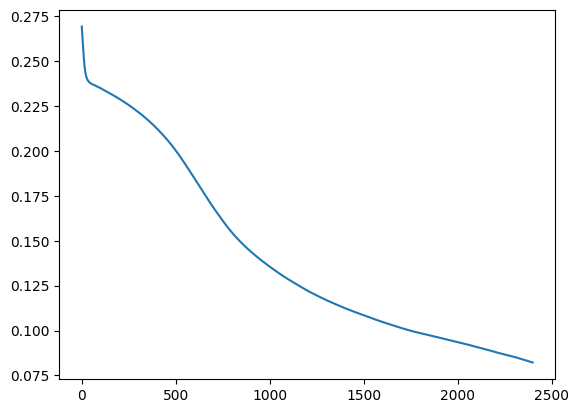

In [64]:
plt.plot(errors)

In [66]:
data_test = (np.random.rand(1000, 2) * 2) - 1
y = train(data_test, 0.0001, params, traing = False)

In [67]:
y = np.where(y >=0.5, 1, 0)

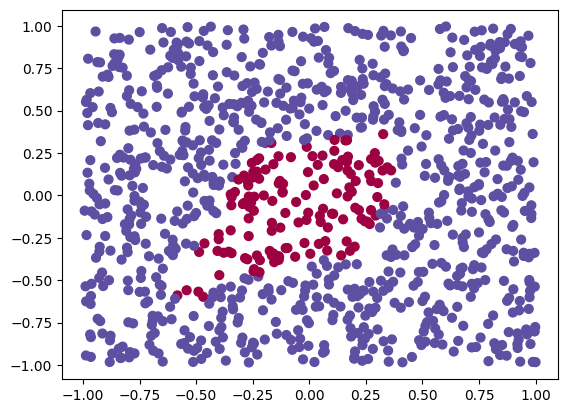

In [68]:
plt.scatter(data_test[:, 0], data_test[:, 1], c =y[:, 0], s=40, cmap = plt.cm.Spectral)

In [71]:
x = np.array(42)
x.ndim

0